### Narrative: I work for a airline company and have been tasked to research flight delays. I have specifically been asked about flight delays on weekdays vs weekends as well as flight delays from destination aiports. Below are my findings.

### SQL Code:

### Python Code:

In [303]:
import pandas as pd

In [303]:
flights = pd.read_csv("https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Fall/Project%201/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5,17
1,2013,1,1,533,4,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5,33
2,2013,1,1,542,2,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5,42
3,2013,1,1,554,-4,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,6,54
4,2013,1,1,555,-5,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,6,55


### Are flight delays more likely to occur on weekdays or weekends?

In [319]:
# creates new data column combining year month and day columns to datetime format
flights['date'] = pd.to_datetime(flights[['year','month','day']])

In [320]:
# reorder columns to bring date column to front
flights = flights[['date','year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute']]

In [321]:
# create new column which converts date into day of week
#flights['weekday'] = flights['date'].dt.day_name()
flights['weekday'] = flights['date'].dt.day_name()

In [322]:
flights.head()

,date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday
0,2013-01-01,2013,1,1,517,2,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5,17,Tuesday
1,2013-01-01,2013,1,1,533,4,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5,33,Tuesday
2,2013-01-01,2013,1,1,542,2,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5,42,Tuesday
3,2013-01-01,2013,1,1,554,-4,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,6,54,Tuesday
4,2013-01-01,2013,1,1,555,-5,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,6,55,Tuesday


In [323]:
# create new column to indicate if day of week is weekend and place 1 if true
flights.loc[(flights['weekday'] == 'Sunday') | (flights['weekday'] == 'Saturday') , 'weekend'] = '1'
flights.loc[(flights['weekday'] == 'Monday') | (flights['weekday'] == 'Tuesday')
                                               | (flights['weekday'] == 'Wednesday')
                                               | (flights['weekday'] == 'Thursday')
                                               | (flights['weekday'] == 'Friday') , 'weekend'] = '0'

In [324]:
flights.head()

,date,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,weekday,weekend
0,2013-01-01,2013,1,1,517,2,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5,17,Tuesday,0
1,2013-01-01,2013,1,1,533,4,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5,33,Tuesday,0
2,2013-01-01,2013,1,1,542,2,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5,42,Tuesday,0
3,2013-01-01,2013,1,1,554,-4,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,6,54,Tuesday,0
4,2013-01-01,2013,1,1,555,-5,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,6,55,Tuesday,0


In [325]:
# create dataframe containing weekday, dep_delay,arr_delay columns
delay_df = flights[['weekend','weekday', 'dep_delay','arr_delay']]

In [326]:
delay_df.head()

,weekend,weekday,dep_delay,arr_delay
0,0,Tuesday,2,11.0
1,0,Tuesday,4,20.0
2,0,Tuesday,2,33.0
3,0,Tuesday,-4,12.0
4,0,Tuesday,-5,19.0


In [327]:
# group new dataframe by day of week and count number of entries for each day
total_flights = len(delay_df)
total_flights

50000

In [328]:
# remove all flights that left and arrived early or on time
delay_df = delay_df[(delay_df['arr_delay'] > 0) | (delay_df['dep_delay'] > 0)]

In [329]:
delay_df.head()

,weekend,weekday,dep_delay,arr_delay
0,0,Tuesday,2,11.0
1,0,Tuesday,4,20.0
2,0,Tuesday,2,33.0
3,0,Tuesday,-4,12.0
4,0,Tuesday,-5,19.0


In [330]:
# create new column which shows 0 for flights that departed on time or early
# and a 1 for flights that departed late
delay_df.loc[delay_df['dep_delay'] <= 0, 'count_dep_del'] = 0
delay_df.loc[delay_df['dep_delay'] > 0, 'count_dep_del'] = 1
# create new column which shows 0 for flights that arrived on time or early
# and a 1 for flights that arrived late
delay_df.loc[delay_df['arr_delay'] <= 0, 'count_arr_del'] = 0
delay_df.loc[delay_df['arr_delay'] > 0, 'count_arr_del'] = 1

In [331]:
# drop unnecessary columns
delay_df = delay_df.drop(['dep_delay', 'arr_delay'],axis = 1)

In [332]:
#delay_df['total_delay'] = delay_df['count_arr_del'] + delay_df['count_dep_del']

In [333]:
# group delayed flights by weekend status and sum delay status columns
weekend = delay_df.groupby('weekend').sum()
weekend

,count_dep_del,count_arr_del
weekend,,
0,27146.0,32037.0
1,8059.0,8293.0


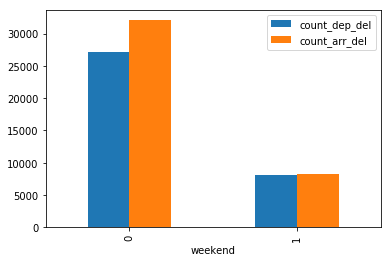

In [334]:
# create bar plot to visualize delays for weekday flights (0) vs weekend flights (1) 
weekend.plot.bar()

It is clear from the graph above that there are many more delayed flights during the week then on the weekends. 

In [335]:
# create new column which shows probability that flight is delayed on arrival or departure for weekends
# and week days
weekend['prob_arr_delay'] = weekend['count_arr_del']/50000
weekend['prob_dep_delay'] = weekend['count_dep_del']/50000

In [336]:
weekend

,count_dep_del,count_arr_del,prob_arr_delay,prob_dep_delay
weekend,,,,
0,27146.0,32037.0,0.64074,0.54292
1,8059.0,8293.0,0.16586,0.16118


Based on the prob of delays the propability of getting delayed on a weekday is 64% upon arrival and 54% upon departure. While on the weekends it is only 17% upon arrival and 16% upon departure.

- https://stackoverflow.com/questions/18944993/combine-pandas-dataframe-datetime-columns

- https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe/35321983

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.weekday.html

***

In [337]:
import pandas as pd
flights = pd.read_csv("https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Fall/Project%201/flights.csv")
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517,2,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5,17
1,2013,1,1,533,4,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5,33
2,2013,1,1,542,2,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5,42
3,2013,1,1,554,-4,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,6,54
4,2013,1,1,555,-5,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,6,55


In [338]:
# remove all flights that left and arrived early or on time
delay_df = flights[(flights['arr_delay'] > 0) | (flights['dep_delay'] > 0)]

In [339]:
# create new column which shows 0 for flights that departed on time or early
# and a 1 for flights that departed late
delay_df.loc[delay_df['dep_delay'] <= 0, 'count_dep_del'] = 0
delay_df.loc[delay_df['dep_delay'] > 0, 'count_dep_del'] = 1
# create new column which shows 0 for flights that arrived on time or early
# and a 1 for flights that arrived late
delay_df.loc[delay_df['arr_delay'] <= 0, 'count_arr_del'] = 0
delay_df.loc[delay_df['arr_delay'] > 0, 'count_arr_del'] = 1

In [340]:
delay_df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'count_dep_del',
       'count_arr_del'],
      dtype='object')

- Which destination airport has the most flight delays? 
- Which has the least? 
- Explain why you think this is the case.

In [341]:
# create dataframe containing only needed columns
destination = delay_df[['dest','count_dep_del', 'count_arr_del']]

### Destination Aiport with Most Arrival Delays

In [342]:
destination.groupby('dest')['count_arr_del'].sum().sort_values(ascending=False).head()

dest
ATL    2340.0
ORD    2049.0
LAX    2008.0
CLT    1754.0
SFO    1536.0
Name: count_arr_del, dtype: float64

Atlanta has the most arrival delays, this might be a result of being the largest airport in the country having the most daily traffic then any other aiport.

### Destination Aiport with Most Departure Delays

In [343]:
destination.groupby('dest')['count_dep_del'].sum().sort_values(ascending=False).head()

dest
ORD    1698.0
LAX    1671.0
ATL    1601.0
SFO    1554.0
FLL    1394.0
Name: count_dep_del, dtype: float64

Orlando's rapid change in weather, such as flash storms can cause the high amount of departure delays for flights.

### Destination Aiport with Least Arrival Delays

In [344]:
destination.groupby('dest')['count_arr_del'].sum().sort_values(ascending=True).head()

dest
MTJ    0.0
PSP    1.0
EYW    1.0
MVY    1.0
BZN    3.0
Name: count_arr_del, dtype: float64

MTJ is a small airport in Montrose Colorado and doesnt have much air traffic therefore they have no arrival delays and have very low departure delays. 

### Destination Aiport with Least Departure Delays

In [345]:
destination.groupby('dest')['count_dep_del'].sum().sort_values(ascending=True).head()

dest
HDN    1.0
MVY    1.0
PSP    1.0
EYW    1.0
MTJ    2.0
Name: count_dep_del, dtype: float64

EYW, PSP, MVY, HDN are all small airports and don't have many flights therefore they don't have much air traffic and very few departure delays.